In [501]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [502]:
labels = ["alexa", "beethoven", "despacito", "play", "still"]

In [503]:
# Set up files with appropriate labels
all_data = []
for direction in os.listdir('csv_files/'):
    for filename in os.listdir(f'csv_files/{direction}'):
        all_data.append([filename, direction]) 
        
files_df = pd.DataFrame(all_data)
files_df.columns = ['Filename', 'Direction']

In [504]:
# Create training and testing sets
train_files, test_files = train_test_split(files_df, test_size=0.2, stratify=files_df['Direction'])

In [505]:
# convert files to csv
train_files.to_csv("train.csv", index=False)
test_files.to_csv("test.csv", index=False)

In [506]:
train_labels = pd.read_csv("train.csv") # Update directory
test_labels = pd.read_csv("test.csv") # Update directory

train_dir = test_dir = "csv_files/" # Update directory

In [507]:
# Function to load dataset
def load_data(label_df, data_dir):
    # Empty lists to store features and labels
    features = []
    labels = []

    for _, row in label_df.iterrows():
        filename = os.path.join(data_dir, row['Direction'], row['Filename'])

        # Read file into pandas dataframe
        df = pd.read_csv(filename)

        # Keep only accelerometer and gyroscope signals
        data = df[['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']].values.astype(np.float32)

        # Normalize data
        data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
   
        # Zero padding
        while len(data) < 500:
            zeros = np.array([[0, 0, 0, 0, 0, 0]])
            data = np.append(data, zeros, axis=0)
        
        # Populate lists with normalized data and labels
        features.append(data.flatten())
        labels.append(row['Direction'])

    return features, labels

In [508]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    # Create the SVM classifier
    svm_classifier = SVC(kernel='rbf')

    # Train the classifier
    svm_classifier.fit(X_train, y_train)

    # Perform prediction on the test set
    y_pred = svm_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'SVM accuracy: {accuracy:.3%}')

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", 
                xticklabels = svm_classifier.classes_, yticklabels = svm_classifier.classes_)
    plt.title('train')
    plt.xlabel('pred')
    plt.ylabel('actual')
    plt.show()
    
    return svm_classifier

In [509]:
# Create the train and test sets
X_train, y_train = load_data(train_labels, train_dir)
X_test, y_test = load_data(test_labels, test_dir)

SVM accuracy: 89.583%


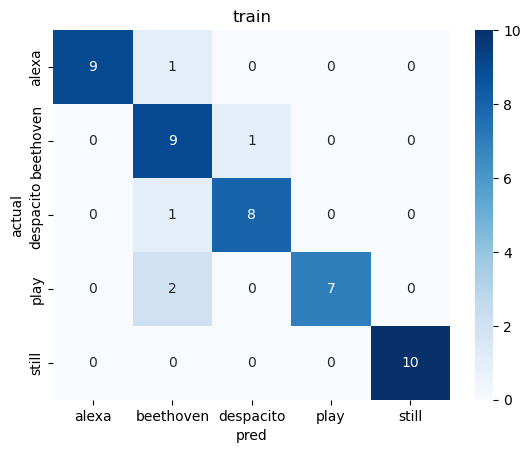

In [510]:
# Perform training and testing with SVM
svm = train_and_evaluate_svm(X_train, y_train, X_test, y_test)
